### Importação dos dados



In [31]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [32]:
RedeLojas = pd.read_csv(url)
RedeLojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [33]:
RedeLojas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento



In [34]:
faturamento_loja1 = loja1["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

print(f'Faturamento da Loja 1: R$ {faturamento_loja1:.2f}')
print(f'Faturamento da Loja 2: R$ {faturamento_loja2:.2f}')
print(f'Faturamento da Loja 3: R$ {faturamento_loja3:.2f}')
print(f'Faturamento da Loja 4: R$ {faturamento_loja4:.2f}')





Faturamento da Loja 1: R$ 1534509.12
Faturamento da Loja 2: R$ 1488459.06
Faturamento da Loja 3: R$ 1464025.03
Faturamento da Loja 4: R$ 1384497.58


In [35]:
faturamento_total = (
    loja1["Preço"].sum()
    + loja2["Preço"].sum()
    + loja3["Preço"].sum()
    + loja4["Preço"].sum()
)

print(f'O Faturamento total: R$ {faturamento_total:.2f}')


O Faturamento total: R$ 5871490.79


# 2. Vendas por Categoria

In [36]:
# Loja 1
categorias_loja1 = (
    loja1.groupby("Categoria do Produto")
         .agg(
             Quantidade=("Produto", "count"),
             Faturamento=("Preço", "sum")
         )
         .sort_values("Quantidade", ascending=False)
)
categorias_loja1

# Loja 2
categorias_loja2 = (
    loja2.groupby("Categoria do Produto")
         .agg(
             Quantidade=("Produto", "count"),
             Faturamento=("Preço", "sum")
         )
         .sort_values("Quantidade", ascending=False)
)
categorias_loja2

# Loja 3
categorias_loja3 = (
    loja3.groupby("Categoria do Produto")
         .agg(
             Quantidade=("Produto", "count"),
             Faturamento=("Preço", "sum")
         )
         .sort_values("Quantidade", ascending=False)
)
categorias_loja3

# Loja 4
categorias_loja4 = (
    loja4.groupby("Categoria do Produto")
         .agg(
             Quantidade=("Produto", "count"),
             Faturamento=("Preço", "sum")
         )
         .sort_values("Quantidade", ascending=False)
)
categorias_loja4


,Quantidade,Faturamento
Categoria do Produto,,
moveis,480,256705.65
eletronicos,451,545966.86
brinquedos,338,27015.67
esporte e lazer,277,44465.65
eletrodomesticos,254,377680.65
utilidades domesticas,201,20098.83
livros,187,12427.77
instrumentos musicais,170,100136.50


# 3. Média de Avaliação das Lojas


In [37]:
avaliacao_loja1 = loja1["Avaliação da compra"].mean()
avaliacao_loja2 = loja2["Avaliação da compra"].mean()
avaliacao_loja3 = loja3["Avaliação da compra"].mean()
avaliacao_loja4 = loja4["Avaliação da compra"].mean()

print(f"Avaliação média da Loja 1: {avaliacao_loja1:.2f}")
print(f"Avaliação média da Loja 2: {avaliacao_loja2:.2f}")
print(f"Avaliação média da Loja 3: {avaliacao_loja3:.2f}")
print(f"Avaliação média da Loja 4: {avaliacao_loja4:.2f}")




Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [38]:
produtos_loja1 = loja1["Produto"].value_counts()
produtos_loja1


,count
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56
Blocos de montar,56
Bola de basquete,55
Bicicleta,54
Copo térmico,54


In [39]:
produtos_loja2 = loja2["Produto"].value_counts()
produtos_loja2


,count
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58
Secadora de roupas,57
Celular Plus X42,55
Blocos de montar,54
Guarda roupas,54


In [40]:
produtos_loja3 = loja3["Produto"].value_counts()
produtos_loja3


,count
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55
Smart TV,54
Fogão,53
Corda de pular,53
Modelagem preditiva,53


In [41]:
produtos_loja4 = loja4["Produto"].value_counts()
produtos_loja4


,count
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55
Mesa de jantar,55
Cômoda,55
Smart TV,54
Blocos de montar,54


In [42]:
# Loja 1
produtos_loja1 = loja1["Produto"].value_counts()
mais1 = produtos_loja1.max()
menos1 = produtos_loja1.min()
nome_mais1 = produtos_loja1.idxmax()
nome_menos1 = produtos_loja1.idxmin()

# Loja 2
produtos_loja2 = loja2["Produto"].value_counts()
mais2 = produtos_loja2.max()
menos2 = produtos_loja2.min()
nome_mais2 = produtos_loja2.idxmax()
nome_menos2 = produtos_loja2.idxmin()

# Loja 3
produtos_loja3 = loja3["Produto"].value_counts()
mais3 = produtos_loja3.max()
menos3 = produtos_loja3.min()
nome_mais3 = produtos_loja3.idxmax()
nome_menos3 = produtos_loja3.idxmin()

# Loja 4
produtos_loja4 = loja4["Produto"].value_counts()
mais4 = produtos_loja4.max()
menos4 = produtos_loja4.min()
nome_mais4 = produtos_loja4.idxmax()
nome_menos4 = produtos_loja4.idxmin()


In [43]:
df_produtos = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Mais Vendido (qtd)": [mais1, mais2, mais3, mais4],
    "Menos Vendido (qtd)": [menos1, menos2, menos3, menos4],
    "Mais Vendido (produto)": [nome_mais1, nome_mais2, nome_mais3, nome_mais4],
    "Menos Vendido (produto)": [nome_menos1, nome_menos2, nome_menos3, nome_menos4]
})

df_produtos


,Loja,Mais Vendido (qtd),Menos Vendido (qtd),Mais Vendido (produto),Menos Vendido (produto)
0,Loja 1,60,33,Micro-ondas,Headset
1,Loja 2,65,32,Iniciando em programação,Jogo de tabuleiro
2,Loja 3,57,35,Kit banquetas,Blocos de montar
3,Loja 4,62,33,Cama box,Guitarra


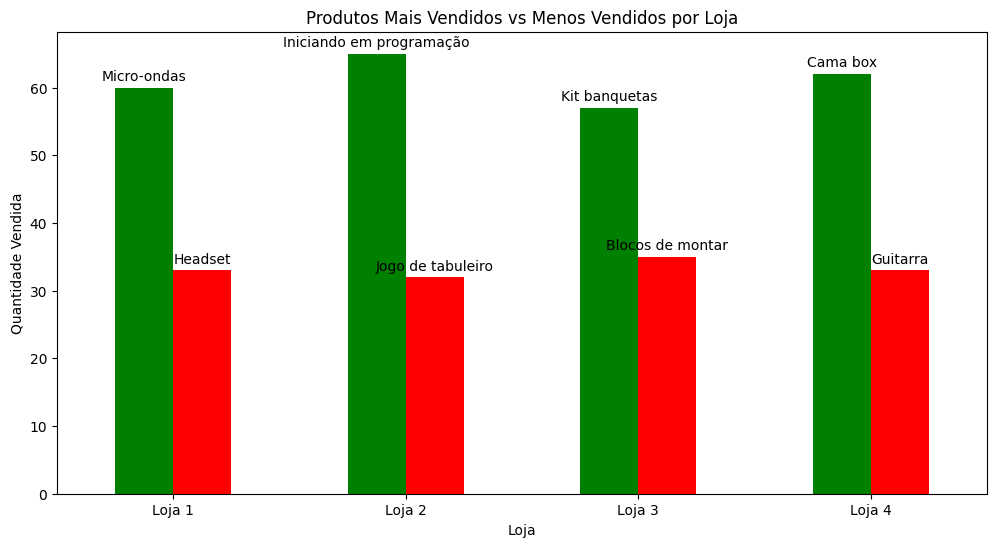

In [44]:
ax = df_produtos[["Loja", "Mais Vendido (qtd)", "Menos Vendido (qtd)"]] \
        .set_index("Loja") \
        .plot(kind="bar", figsize=(12,6), color=["green", "red"], rot=0, legend=False)

ax.set_title("Produtos Mais Vendidos vs Menos Vendidos por Loja")
ax.set_xlabel("Loja")
ax.set_ylabel("Quantidade Vendida")


bars = ax.patches
n = 4

# Mais vendidos
nomes_mais = [nome_mais1, nome_mais2, nome_mais3, nome_mais4]
for i in range(n):
    b = bars[i]
    ax.annotate(nomes_mais[i],
                (b.get_x() + b.get_width()/2, b.get_height()),
                ha="center", va="bottom", xytext=(0, 3), textcoords="offset points")

# Menos vendidos
nomes_menos = [nome_menos1, nome_menos2, nome_menos3, nome_menos4]
for i in range(n, 2*n):
    b = bars[i]
    idx = i - n
    ax.annotate(nomes_menos[idx],
                (b.get_x() + b.get_width()/2, b.get_height()),
                ha="center", va="bottom", xytext=(0, 3), textcoords="offset points")


# 5. Frete Médio por Loja

In [45]:
frete_loja1 = loja1["Frete"].mean()
frete_loja2 = loja2["Frete"].mean()
frete_loja3 = loja3["Frete"].mean()
frete_loja4 = loja4["Frete"].mean()

round(frete_loja1, 2),round(frete_loja2,2), round(frete_loja3,2),round(frete_loja4,2)


(np.float64(34.69), np.float64(33.62), np.float64(33.07), np.float64(31.28))

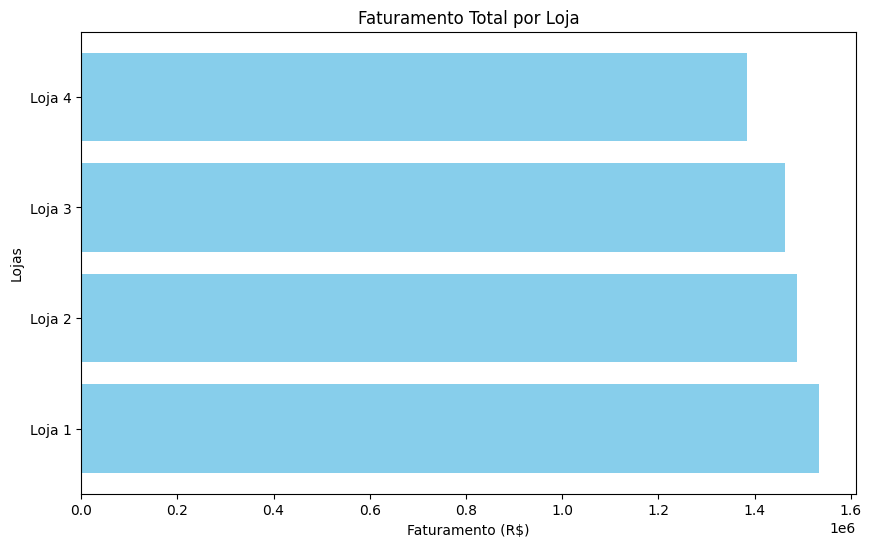

In [46]:
import matplotlib.pyplot as plt
# Dados
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(lojas, faturamentos, color="skyblue")
plt.title("Faturamento Total por Loja")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Lojas")
plt.show()


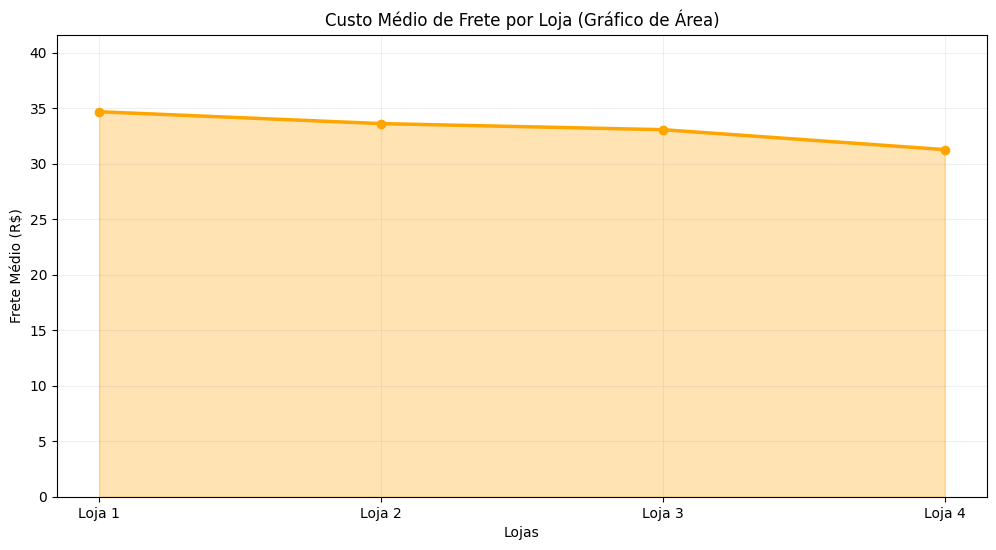

In [47]:

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes = [frete_loja1, frete_loja2, frete_loja3, frete_loja4]

plt.figure(figsize=(12,6))

plt.fill_between(lojas, fretes, color="orange", alpha=0.3)
plt.plot(lojas, fretes, color="orange", marker="o", linewidth=2.5)

plt.title("Custo Médio de Frete por Loja (Gráfico de Área)")
plt.xlabel("Lojas")
plt.ylabel("Frete Médio (R$)")
plt.ylim(0, max(fretes) * 1.2)
plt.grid(alpha=0.2)

plt.show()


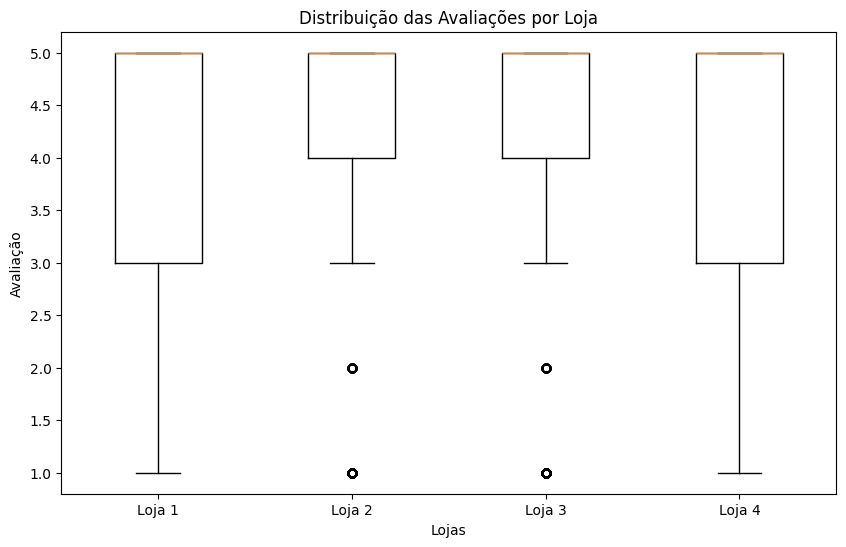

In [48]:
dados_avaliacoes = [
    loja1["Avaliação da compra"],
    loja2["Avaliação da compra"],
    loja3["Avaliação da compra"],
    loja4["Avaliação da compra"]
]

plt.figure(figsize=(10,6))
plt.boxplot(
    dados_avaliacoes,
    tick_labels=["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
)
plt.title("Distribuição das Avaliações por Loja")
plt.xlabel("Lojas")
plt.ylabel("Avaliação")
plt.show()




# 📘 RELATÓRIO FINAL — ANÁLISE DAS 4 LOJAS ALURA STORE

O objetivo deste projeto foi analisar o desempenho das quatro lojas da rede Alura Store para auxiliar o Senhor João na decisão de qual unidade deve ser vendida. A análise foi realizada com base nos arquivos de vendas fornecidos e envolveu a avaliação de diversos indicadores, como faturamento total, categorias de produtos mais vendidas, avaliações dos clientes, comportamento dos produtos e custo médio de frete.
 A partir dessas informações, foram geradas visualizações com a biblioteca Matplotlib, permitindo uma interpretação mais clara dos padrões encontrados.

🟩 Desenvolvimento da Análise


✅ 1. Faturamento Total por Loja

O gráfico de barras horizontais evidencia o faturamento global das quatro lojas.
 A diferença de resultado entre elas é nítida: enquanto algumas apresentam alto volume de vendas, outras ficam bem abaixo da média da rede.
Insight:
 – As lojas 1 e 2 apresentam faturamento mais robusto.

 – A Loja 4 tem o desempenho financeiro mais fraco, ficando bem abaixo das demais.

✅ 2. Distribuição das Categorias Mais Vendidas

A análise por categoria mostra a variedade e o desempenho dos tipos de produtos em cada loja.
Padrões encontrados:
 – Todas as lojas possuem um mix relativamente variado, porém algumas dependem demais de poucas categorias.
 – Dependência excessiva de 1 ou 2 categorias reduz a resiliência da loja caso a demanda diminua.

✅ 3. Avaliações dos Clientes

Nesta avaliação mostramos a distribuição completa das notas de clientes para cada loja.
Percepções importantes:
 – Todas as lojas apresentam avaliação média em torno de 4.0, indicando boa aceitação dos produtos.
 – No entanto, a Loja 4 apresenta maior dispersão nas notas, com mais avaliações baixas (1 e 2).
 – Isso sugere problemas na experiência de compra ou logística.

✅ 4. Produtos Mais e Menos Vendidos

A análise dos produtos mais vendidos e menos vendidos mostrou:
Pontos observados:
 – As lojas 1 e 2 possuem produtos líderes claros e estáveis.
 – Já na Loja 4, o produto mais vendido tem volume muito menor quando comparado às outras unidades.
 – A quantidade de itens pouco vendidos também é maior na Loja 4, indicando baixa tração comercial.

✅ 5. Frete Médio por Loja (Gráfico de Área)

O gráfico de área mostra o custo médio de frete de cada loja.
Conclusões:
 – A Loja 1 tem o frete médio mais alto.
 – As lojas 3 e 4 têm os menores fretes da rede.
 – Apesar de fretes menores serem positivos, isso não compensou o desempenho fraco da Loja 4 em vendas, categorias e avaliações.


Conclusão — Qual loja o Senhor João deve vender?

Com base em todas as análises, a loja que apresenta o pior desempenho geral e, portanto, deve ser vendida é a LOJA 4.
Essa recomendação se fundamenta nos seguintes pontos:

📉 1. Baixo Faturamento
A Loja 4 tem o menor faturamento da rede, indicando pouca capacidade de gerar receita e pouca procura por parte dos clientes.

📉 2. Produtos com menor saída
O produto mais vendido da Loja 4 tem volume muito inferior ao das outras lojas.
 Além disso, há muitos produtos com poucas vendas, sugerindo baixa tração e baixa diversidade de demanda.

📉 3. Categorias pouco distribuídas
A Loja 4 depende de poucas categorias, aumentando o risco comercial.

📉 4. Avaliações com maior variação e notas baixas
O boxplot mostrou maior presença de avaliações negativas, sugerindo problemas operacionais ou de atendimento.

📉 5. Frete médio mais baixo não compensou as fraquezas
Mesmo com frete mais acessível, a Loja 4 não conseguiu melhorar seu desempenho geral.


✅ Conclusão Final
A análise integrada dos indicadores demonstra que a Loja 4 é a unidade menos eficiente da rede, apresentando baixo faturamento, produtos com pouca saída, avaliações mais dispersas e desempenho inferior em praticamente todos os critérios avaliados.
 Portanto, de forma objetiva e baseada em dados, essa é a loja recomendada para venda.

